<a href="https://colab.research.google.com/github/Pizza0409/AlexNet/blob/main/AlexNet_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
import pandas as pd

In [10]:
# check CUDA
CUDA = torch.cuda.is_available()

device = torch.device('cuda' if CUDA else 'cpu')
print(device)

cuda


In [12]:
import json
import zipfile
import os

api_token = {"username":"loyunsheng","key":"a8e6838265ffc748574235b79c4f1435"}

os.makedirs('/root/.kaggle', exist_ok=True)

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists('/kaggle'):
  os.makedirs('/kaggle')

os.chdir('/kaggle')

!kaggle datasets download -d chetankv/dogs-cats-images

!ls /kaggle



Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)
 dataset   dogs-cats-images.zip  'dog vs cat'   input


In [4]:
!unzip dogs-cats-images.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3711.jpg  
  inflat

In [13]:
pwd

'/kaggle'

In [19]:
def AlexNet():
  model = Sequential([
      # Convolution 1 with MaxPooling
      layers.Conv2D(input_shape=(227, 227 ,3), filters=96, kernel_size=(11, 11), strides=(4, 4)),
      layers.Activation('relu'),
      layers.BatchNormalization(),
      layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
      # Convolution 2 with MaxPooling
      layers.ZeroPadding2D(padding=(2, 2)),
      layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(3, 3)),
      layers.Activation('relu'),
      layers.BatchNormalization(),
      layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),
      # Convolution 3
      layers.ZeroPadding2D(padding=(1, 1)),
      layers.Conv2D(filters=384, kernel_size=(3, 3)),
      layers.Activation('relu'),
      # Convolution 4
      layers.ZeroPadding2D(padding=(1, 1)),
      layers.Conv2D(filters=384, kernel_size=(3, 3)),
      layers.Activation('relu'),
      # Convolution 5
      layers.ZeroPadding2D(padding=(1, 1)),
      layers.Conv2D(filters=256, kernel_size=(3, 3)),
      layers.Activation('relu'),
      layers.BatchNormalization(),
      layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)),

      layers.Flatten(),

      # Fully-Connected 1
      layers.Dense(4096, activation='relu', input_shape=6*6*128*2),
      layers.Dropout(0.5),
      layers.Dense(4096, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(2),
 ])

  # Add dynamic lr
  lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=5,
        decay_rate=0.5)
  model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, weight_decay=0.0005, learning_rate=lr_schedule), loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

  return model

In [15]:
train_dataset_path = '/kaggle/dataset/training_set'
valid_dataset_path = '/kaggle/dataset/test_set'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    horizontal_flip=True,

)

validate_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(227, 227),
    batch_size=256
)

valid_datagenerator = validate_datagen.flow_from_directory(
    valid_dataset_path,
    target_size=(227, 227),
    batch_size=256,
    shuffle=False,
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
model = AlexNet()

with tf.device('/GPU:0'):
    model_train = model.fit(
        train_generator,
        epochs=30,
        validation_data=valid_datagenerator
    )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.4966 - loss: 1.3987 - val_accuracy: 0.5000 - val_loss: 0.7284
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.5023 - loss: 0.7223 - val_accuracy: 0.5000 - val_loss: 0.7240
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4965 - loss: 0.7231 - val_accuracy: 0.5000 - val_loss: 0.7228
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.4934 - loss: 0.7245 - val_accuracy: 0.5000 - val_loss: 0.7220
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.5020 - loss: 0.7204 - val_accuracy: 0.5000 - val_loss: 0.7213
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.4946 - loss: 0.7251 - val_accuracy: 0.5000 - val_loss: 0.7207
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5019 - loss: 0.7213 - val_accuracy: 0.5000 - val_loss: 0.7203
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.4984 - loss: 0.7222 - val_accuracy: 0.5000 - val_loss: 0.

In [21]:
print(model_train.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Minimum Validation Loss: 0.7203


<Axes: title={'center': 'Accuracy'}>

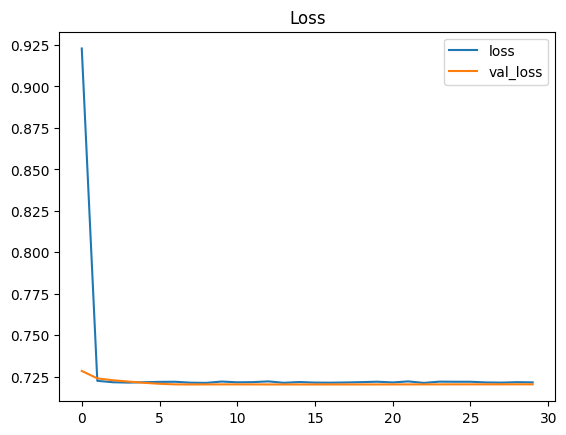

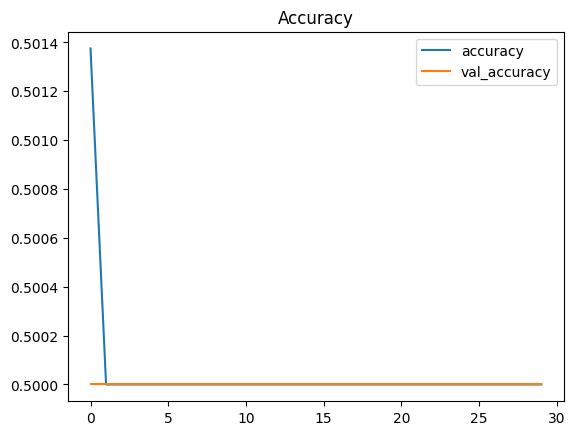

In [22]:
model_train_df = pd.DataFrame(model_train.history)

print("Minimum Validation Loss: {:0.4f}".format(model_train_df['val_loss'].min()))
model_train_df.loc[:, ['loss', 'val_loss']].plot(title='Loss')
model_train_df.loc[:, ['accuracy', 'val_accuracy']].plot(title='Accuracy')